# CKA Analysis

In [2]:
import torch
import torch.nn as nn
from utils import networks, plotting_tools, engine, messing, CKA
from torchvision import datasets, models, transforms

In [3]:
data_path = "../Data" #Include here your data path - torchvision based -

BATCH_SIZE = 64 #Regular parameters
LEARNING_RATE = 0.01
NUM_EPOCH = 5
CRITERION = nn.CrossEntropyLoss() #CrossEntropy loss convey a post softmax probability rating, rather than a feature difference analysis.

train_dataset_MNIST = datasets.MNIST(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_MNIST = datasets.MNIST(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_MNIST = torch.utils.data.DataLoader(dataset=train_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(dataset=test_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)

Note that this CKA analysis is mostly derived from [this](https://github.com/google-research/google-research/tree/master/representation_similarity) repository which gives many useful insight on the method. However, it is here associated with hook registering function in order to dinamicly compute the CKA of a network while or after training.

## Resnet50 analysis

In [ ]:
LEARNING_RATE = 0.01

test_net = models.resnet50()
net_2 = models.resnet50()

for module in net_2.modules():
    if(hasattr(module, "in_channels") and hasattr(module, "out_channels")):
        if(module.in_channels == module.out_channels):
            if(module.kernel_size[0] != 1):
                messing.var_modifier(module.weight,10**-5)

first_matrix_before_training_test = CKA.CKA_net_computation(test_net,test_loader_CIFAR10, fast_computation=True)
first_matrix_before_training_zero = CKA.CKA_net_computation(net_2,test_loader_CIFAR10, fast_computation=True)

two_epochs_plotting_val = engine.resnet_compare(test_net.cuda(),net_2.cuda(),nb_epochs=2, test_loader=test_loader_CIFAR10,\
                          train_loader=train_loader_CIFAR10, LEARNING_RATE=LEARNING_RATE)
# Note: We do not use a strict zero initialization, rather a low variance one, as CKA analysis of strictly zero value makes little sense.

two_epochs_matrix_before_training_test = CKA.CKA_net_computation(test_net.cpu(),test_loader_CIFAR10, fast_computation=True)
two_epochs_matrix_before_training_zero = CKA.CKA_net_computation(net_2.cpu(),test_loader_CIFAR10, fast_computation=True)

four_epochs_plotting_val = engine.resnet_compare(test_net.cuda(),net_2.cuda(),nb_epochs=2, test_loader=test_loader_CIFAR10,\
                          train_loader=train_loader_CIFAR10, LEARNING_RATE=LEARNING_RATE)

four_epochs_matrix_before_training_test = CKA.CKA_net_computation(test_net.cpu(),test_loader_CIFAR10, fast_computation=True)
four_epochs_matrix_before_training_zero = CKA.CKA_net_computation(net_2.cpu(),test_loader_CIFAR10, fast_computation=True)

Starting epoch n°0
Done: 99%, model1: 32.83%, model2: 39.77%, loss1: 1.6323, loss2: 1.2723 
Ending epoch n°0
Starting epoch n°1
Done: 99%, model1: 31.16%, model2: 39.15%, loss1: 2.3282, loss2: 2.2349 
Ending epoch n°1
Starting epoch n°0


## Plot the corresponding CKA matrixes at several stages of training

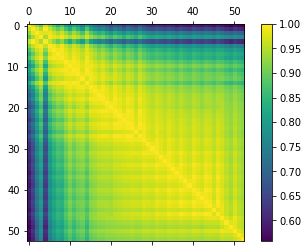

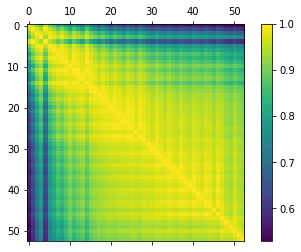

In [19]:
plotting_tools.CKAmatshow(first_matrix_before_training_test.detach().numpy())
plotting_tools.CKAmatshow(first_matrix_before_training_zero.detach().numpy())

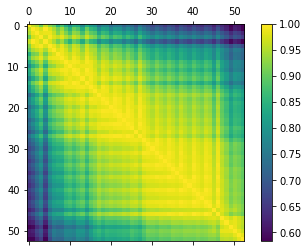

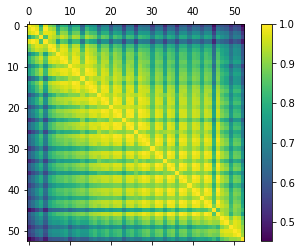

In [21]:
plotting_tools.CKAmatshow(two_epochs_matrix_before_training_test.detach().numpy())
plotting_tools.CKAmatshow(two_epochs_matrix_before_training_zero.detach().numpy())

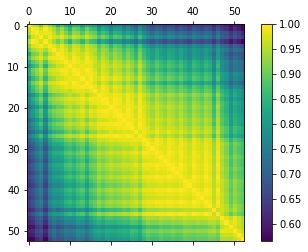

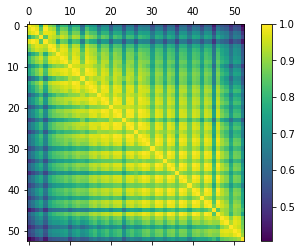

In [22]:
plotting_tools.CKAmatshow(four_epochs_matrix_before_training_test.detach().numpy())
plotting_tools.CKAmatshow(four_epochs_matrix_before_training_zero.detach().numpy())